In [19]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('shortCICDDoS2019.csv')
df.head()

C:\Users\kdagi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ACK Flag Count,Active Max,Active Mean,Active Min,Active Std,Average Packet Size,Avg Bwd Segment Size,Avg Fwd Segment Size,Bwd Avg Bulk Rate,...,Subflow Fwd Packets,Time,Total Backward Packets,Total Fwd Packets,Total Length of Bwd Packets,Total Length of Fwd Packets,URG Flag Count,act_data_pkt_fwd,min_seg_size_forward,BiFlowsCount
0,180548,0,0,0.0,0,0.0,2208.000000,0.0,1472.000000,0,...,2,2018-12-01 11:25:46 AM,0,2,0,2944,0,1,27,3844
1,5303468,1,0,0.0,0,0.0,0.000000,0.0,0.000000,0,...,2,2018-12-01 1:30:17 PM,0,2,0,0,0,0,20,5583
2,2544372,0,0,0.0,0,0.0,450.857143,0.0,419.428571,0,...,14,2018-12-01 10:40:03 AM,0,14,0,5872,0,13,0,2297
3,2937474,0,0,0.0,0,0.0,478.000000,0.0,368.000000,0,...,4,2018-12-01 10:41:20 AM,0,4,0,1472,0,3,20,2439
4,4876523,1,0,0.0,0,0.0,0.000000,0.0,0.000000,0,...,2,2018-12-01 1:34:19 PM,0,2,0,0,0,0,20,6549


In [3]:
df["Label"].value_counts()

LDAP       407276
SYN        295464
NTP        224968
UDP-lag     68432
Benign       3789
WebDDoS        71
Name: Label, dtype: int64

In [4]:
features = ['ACK Flag Count', 'Active Max', 'Active Mean', 'Active Min',
       'Active Std', 'Average Packet Size', 'Avg Bwd Segment Size',
       'Avg Fwd Segment Size', 'Bwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Header Length', 'Bwd IAT Max',
       'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Total',
       'Bwd PSH Flags', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Bwd Packets/s',
       'Bwd URG Flags', 'CWE Flag Count', 'Forward and Backward Packets',
       'Destination IP', 'Destination Port', 'Down/Up Ratio', 'ECE Flag Count',
       'FIN Flag Count', 'Flow Bytes/s', 'Flow Duration', 'Flow IAT Max',
       'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Std', 'Flow ID',
       'Flow Packets/s', 'Fwd Avg Bulk Rate', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Header Length.1', 'Fwd Header Length',
       'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd IAT Std',
       'Fwd IAT Total', 'Fwd PSH Flags', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Min',
       'Fwd Packet Length Std', 'Fwd Packets/s', 'Fwd URG Flags', 'Idle Max',
       'Idle Mean', 'Idle Min', 'Idle Std', 'Inbound',
       'Init_Win_bytes_backward', 'Init_Win_bytes_forward',
       'Max Packet Length', 'Min Packet Length', 'Number of Records',
       'PSH Flag Count', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Protocol', 'RST Flag Count',
       'SYN Flag Count', 'SimillarHTTP', 'Source IP', 'Source Port',
       'Subflow Bwd Bytes', 'Subflow Bwd Packets', 'Subflow Fwd Bytes',
       'Subflow Fwd Packets', 'Time', 'Total Backward Packets',
       'Total Fwd Packets', 'Total Length of Bwd Packets',
       'Total Length of Fwd Packets', 'URG Flag Count', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'BiFlowsCount']

In [5]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\kdagi\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [6]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [7]:
df['target']=df['Label'].apply(targetify)

In [8]:
y = df['target']

In [9]:
X = X.fillna(0)

Regular: 3789
Anomaly: 996211
Proportion: 0.0 : 1


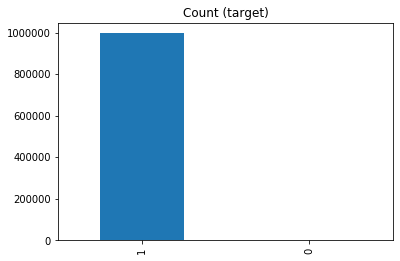

In [10]:
target_count = df.target.value_counts()
print('Regular:', target_count[0])
print('Anomaly:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [11]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

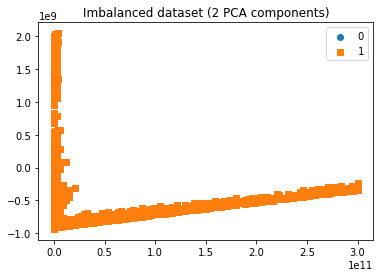

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [13]:
import imblearn

In [15]:
from imblearn.over_sampling import SMOTE



In [25]:
seed = 100
k = 8
sm = SMOTE(k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_sample(X, y)

In [17]:
#smote = SMOTE(ratio='minority')


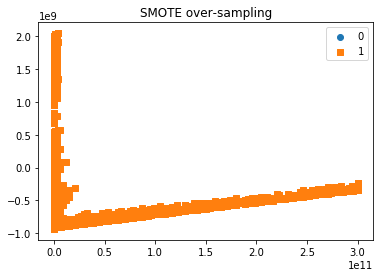

In [26]:
#X, y = smote.fit_sample(X, y)
plot_2d_space(X_res, y_res, 'SMOTE over-sampling')


In [27]:
target_count = df.target.value_counts()
print('Regular:', target_count[0])
print('Anomaly:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Regular: 3789
Anomaly: 996211
Proportion: 0.0 : 1
